<a href="https://colab.research.google.com/github/patrickphatnguyen/Knowledge-Distillation-CNN/blob/master/Experimental_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Note in Colab you can type "pip install" directly in the notebook
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


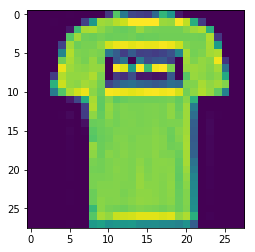

In [5]:

# Show one of the images from the training dataset
plt.imshow(x_train[1])

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


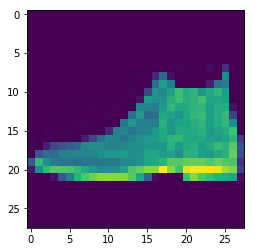

In [23]:
x_test = x_test.reshape(-1,28,28,1)
x_train = x_train.reshape(-1,28,28,1)
plt.imshow(x_test[0,:,:,0])

In [20]:
model = tf.keras.Sequential()# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))# Take a look at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [27]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=50,
         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2587 - acc: 0.9046 - val_loss: 0.2423 - val_acc: 0.9104
Epoch 2/50
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2522 - acc: 0.9080 - val_loss: 0.2332 - val_acc: 0.9122
Epoch 3/50
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2487 - acc: 0.9081 - val_loss: 0.2322 - val_acc: 0.9151
Epoch 4/50
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2440 - acc: 0.9092 - val_loss: 0.2256 - val_acc: 0.9173
Epoch 5/50
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2392 - acc: 0.9099 - val_loss: 0.2284 - val_acc: 0.9171
Epoch 6/50
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2363 - acc: 0.9120 - val_loss: 0.2248 - val_acc: 0.9186
Epoch 7/50
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2325 - acc: 0.9137 - val_loss: 0.

In [30]:
model.save()

In [31]:
model.layers